# Portfolio for SDSPhD20

This notebook contains the exercises and assignments to be answered in a portfolio for the PhD course "Social Data Science: An Applied Introduction to Machine Learning" at Aalborg University, November 2020.

Each day of the course you are given an hour to work on a portfolio with the possibility of sparring with the course lecturers. 

You are expected to attempt to solve the various assignments using the methods and tools taught during the course. Answers should be combined into a notebook (fx by adding answers to a copy of this one). 

**Note:** You are not expected to attempt to solve every single assignment. Note the different requirements for each day.

#### How to hand in your portfolio notebooks

You can hand in your portfolio notebooks in two ways:

- Saving your notebooks in a GitHub repository and then sending the repository URL to the course organizer (Kristian Kjelmann)
- Sharing your notebooks directly with the course organizer (Kristian Kjelmann) in Google Colab.

Kristian’s e-mail: kgk@adm.aau.dk

# Portfolio assignments for Tuesday (unsupervised and supervised machine learning)

**Requirement**: Work on solutions for *either* "unsupervised machine learning with penguins" or "clustering" *and* *either* "supervised machine learning with penguins" or "employee turnover".

---

## Unsupervised machine learning with penguins

The palmer penguin dataset is excellent for EDA and UML. It contains different measures for 3 species of closely related penguins from several islands in Antarctica.

Let's have a look:

Penguin datast: https://github.com/allisonhorst/palmerpenguins
![penguins](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/lter_penguins.png)

![penguin_beaks](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/culmen_depth.png)

### The assignment

1. Inspect the data with some of the standard functions you learned so far (desc, info etc.). What do we have here?
2. Likewise, use some standard visualizations (eg. from seaborn) to express some properties of the data
3. Create a new dataset where you scale all numeric values with the standardscaler.
4. Perform a PCA analysis
5. Investigate the explained variance of the components... do we see an 'elbow'?
5. Plot the data in the space of the first two components. Maybe color it by species or island. What pattern do we see?
6. Inspect the correlation between the components. Which variables are they mostly associated with?

#### Data and libraries

In [ ]:
# standard packaging

import pandas as pd
import seaborn as sns
import numpy as np

sns.set(color_codes=True, rc={'figure.figsize':(10,8)})

from IPython.display import HTML #Youtube embed

In [ ]:
# load the dataset from GitHub - original source

penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

In [ ]:
# You solutions from here...

---

## Clustering

I have created a larger set of variables from the Danish Value Study from 1999. You can find data here:

https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/value99.csv

In all examples, values towards 1 is agree a lot and values towards 5 is disagree a lot.

As an example: "Does not want alchoholics as neighbors" --> 1=does not want, 2=doesnt care

Or: Trust to the military --> 1=Trust very much, 2= Trust some, 3=Trust a little 4=Does not trust at all 

[![2hAEhX.md.png](https://iili.io/2hAEhX.md.png)](https://freeimage.host/i/2hAEhX)

Pick some varibles you think is interesting and play with creating clusters. Can we explain what is going on?

In [ ]:
# Your solutions from here...

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score

In [ ]:
# load the dataset from GitHub - original source

df = pd.read_csv("https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/value99.csv")

In [ ]:
df.head()

,v7,v9,v10,v14,v56,v57,v58,v59,v60,v61,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v123,v124,v125,v126,v127,v128,v129,v130,v131,v132,v133,v134,v135,v136,v137,v138,v170,...,v190,v191,v192,v193,v194,v195,v196,v197,v198,v199,v200,v201,v202,v203,v220,v221,v222,v223,v224,v225,v226,v227,v228,v229,v230,v256,v257,v258,v259,v260,v261,v262,v263,v264,v265,v266,v267,v268,v269,bald
0,2,1,1,1,1,1,1,2,2,4,2,2,2,1,2,2,2,2,2,2,2,2,2,1,2,2,1,2,2,2,1,1,2,1,1,1,1,2,2,2,...,3,1,3,2,2,1,.,1,2,2,1,1,1,3,2,1,2,1,1,1,2,1,2,2,2,2,3,2,3,3,3,2,2,1,4,4,3,2,2,48
1,1,1,2,0,1,1,2,2,1,1,2,2,2,1,2,1,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,1,2,1,2,2,1,...,3,1,2,2,3,1,1,1,1,1,1,2,1,3,2,1,2,1,1,1,2,2,1,2,2,1,1,2,3,3,1,1,2,2,2,1,2,2,1,30
2,1,1,2,0,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,2,1,...,3,2,3,2,3,1,3,2,2,3,1,3,2,3,2,1,2,1,1,1,2,2,2,1,2,2,1,2,2,1,2,2,2,1,2,2,2,1,1,57
3,2,1,1,1,.,1,1,2,2,2,2,2,1,2,2,2,2,2,2,1,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,1,1,2,2,1,...,3,1,3,2,3,1,1,1,2,2,1,2,2,3,1,1,2,1,2,1,2,1,2,2,2,3,3,2,4,3,2,3,2,2,4,3,3,3,2,55
4,1,1,2,0,1,1,2,1,3,3,2,2,2,2,2,2,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,2,.,...,.,1,.,.,.,1,1,2,.,3,1,3,.,.,1,1,2,2,2,1,2,2,2,2,2,.,4,3,3,3,3,4,4,4,4,3,3,2,4,27


In [ ]:
df.info()

In [ ]:
df = df.apply(pd.to_numeric, errors='coerce')

In [ ]:
#group by age, gender
df.groupby(["bald", "v7"]).mean()

In [ ]:
df.shape

(1023, 91)

In [ ]:
df.isnull().sum() # checked for nan-values # 

In [ ]:
df.shape # check shape

(1023, 91)

In [ ]:
df.head()

In [ ]:
#df = df.dropna(axis=0, how='any', inplace=True)

In [ ]:
df.describe()

*italicized text*##data exploration

In [ ]:
# Sns pairplot provides a matrix with scatters on the triangles, and the distribution on the diagonal
#not run for all vars....
#sns.pairplot(df) 

In [ ]:
# A correlation plot
sns.heatmap(df.corr())

In [ ]:
df.replace('.', np.nan, inplace=True)

In [ ]:
#group by age, gender
df.groupby(["bald", "v7"]).mean()

#var selection for cluster

In [ ]:
#var selection in two different datasets... both datasets include selected vars regarding unwanted neighbours
X = (df[['v9', 'v170', 'v256', 'v257', 'v264', 'v260', 'v104', 'v105', 'v106', 'v107', 'v108', 'v109', 'v110', 'v111', 'v112', 'v113', 'v114', 'v115', 'v116']])
X_1 = (df[['v9', 'v170', 'v256', 'v257', 'v264', 'v260', 'v104', 'v105', 'v106', 'v107', 'v108', 'v109', 'v110', 'v111', 'v112', 'v113', 'v114', 'v115', 'v116']])
X = X.dropna()
X_1 = X_1.dropna()
linked = linkage(X, 'ward')
X.head()

In [ ]:
X.reset_index()

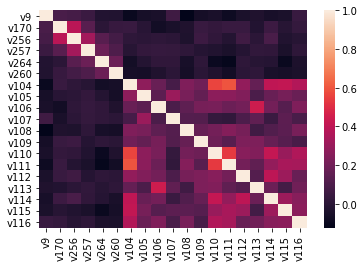

In [ ]:
# A correlation plot
sns.heatmap(X.corr())

In [ ]:
for k in range(2,10):
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward').fit(X)
    labels=cluster.labels_
    dbs=davies_bouldin_score(X, labels)
    dbs=round(dbs,2)
    ch = metrics.calinski_harabasz_score(X, labels)
    ch=round(ch,2)
    ss=metrics.silhouette_score(X, labels, metric='euclidean')
    ss=round(ss,2)
    print("Cluster count-", k, "|", " db score-", dbs, "|", " ch score - ", ch, "|", " ss score - ", ss)
    k=str(k)
    X['cluster'+k]=labels

Cluster count- 2 |  db score- 2.15 |  ch score -  152.46 |  ss score -  0.18
Cluster count- 3 |  db score- 2.2 |  ch score -  101.99 |  ss score -  0.17
Cluster count- 4 |  db score- 2.48 |  ch score -  115.04 |  ss score -  0.13
Cluster count- 5 |  db score- 2.46 |  ch score -  206.82 |  ss score -  0.16
Cluster count- 6 |  db score- 1.63 |  ch score -  275.94 |  ss score -  0.3
Cluster count- 7 |  db score- 1.81 |  ch score -  340.23 |  ss score -  0.3
Cluster count- 8 |  db score- 1.37 |  ch score -  464.43 |  ss score -  0.42
Cluster count- 9 |  db score- 1.37 |  ch score -  589.49 |  ss score -  0.38


##Interpreting clusters
Quick cheat sheet:

Davies Bouldin Score → as low as possible

Calinski-Harabasz → as high as possible

Silhouette-score → is a -1 to +1 thing. 0 is bad while values closer to the edges are better.

Based on the above, the optimal number of clusters should be between 8 or 9

In [ ]:
cluster = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='ward').fit(X)
labels=cluster.labels_
X['cluster']=labels

In [ ]:
for i in range(2,10):
    i=str(i)
    X=X[['cluster'+i,'v9', 'v170', 'v256', 'v257', 'v264', 'v260', 'v104', 'v105', 'v106', 'v107', 'v108', 'v109', 'v110', 'v111', 'v112', 'v113', 'v114', 'v115', 'v116']]
    stuff=X.groupby(['cluster'+i]).mean()
    trans_stuff=stuff.T
    ts=round(trans_stuff,2)
    print("")
    print("")
    print('...  the results for' ,i, 'clusters are!')	
    print(ts)
    print("")
    count=X.groupby(['cluster'+i])['v113'].count()
    print("And the size of the clusters if there are",i, "clusters are")
    print(count)
    print("")
    print("And if we have",i,"clusters, the dendrogram looks like")
    i=int(i)
    figure = plt.figure(figsize=(7.5, 5))
    dendrogram(
            linked,
        truncate_mode='lastp',  # show only the last p merged clusters
        p=i,  # show only the last p merged clusters
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=True,  # to get a distribution impression in truncated branches
    )
    plt.title('Hierarchical Clustering Dendrogram (Ward)')
    plt.xlabel('sample index or (cluster size)')
    plt.ylabel('distance')
    plt.show()

---

## Supervised machine learning with penguins

This assignment uses the same data as for "unsupervised machine learning with penguins". 

If you created solutions for "unsupervised machine learning with penguins", jump to assignment 3.

### The assignment

1. Inspect the data with some of the standard functions you learned so far (desc, info etc.). What do we have here?
2. Likewise, use some standard visualizations (eg. from seaborn) to express some properties of the data
3. Apply stanbdard preprocessing (eg. missing values, scaling, outliers, one-hot-encoding)
4. Split the data in a train & test sample
5. Fit a classification model (target outcome = 'species') on the training data, and evaluate its performance on the test data.
   * Use first a logistic regression to do so.
   * Then, use 2-3 more complex model classes of your choice.

In [ ]:
# standard packaging

import pandas as pd
import seaborn as sns
sns.set(color_codes=True, rc={'figure.figsize':(10,8)})

from IPython.display import HTML #Youtube embed

In [ ]:
# load the dataset from GitHub - original source

penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

In [ ]:
# You solutions from here...

#Data Exploration for SML

In [ ]:
penguins.info

<bound method DataFrame.info of     species_short     island  ...  body_mass_g     sex
0          Adelie  Torgersen  ...       3750.0    MALE
1          Adelie  Torgersen  ...       3800.0  FEMALE
2          Adelie  Torgersen  ...       3250.0  FEMALE
3          Adelie  Torgersen  ...          NaN     NaN
4          Adelie  Torgersen  ...       3450.0  FEMALE
..            ...        ...  ...          ...     ...
339        Gentoo     Biscoe  ...          NaN     NaN
340        Gentoo     Biscoe  ...       4850.0  FEMALE
341        Gentoo     Biscoe  ...       5750.0    MALE
342        Gentoo     Biscoe  ...       5200.0  FEMALE
343        Gentoo     Biscoe  ...       5400.0    MALE

[344 rows x 7 columns]>

In [ ]:
penguins.describe()

In [ ]:
penguins.shape

(344, 7)

In [ ]:
penguins.isnull().sum() # checked for nan-values 

species_short         0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [ ]:
# NaN's are dropped
penguins.dropna(axis=0, how='any', inplace=True)
penguins.head()

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [ ]:
#converting 'island' and 'sex' into binary indicators, to be able to include them in the models
pen = pd.get_dummies(penguins, prefix=['Geo', 's'], columns=['island', 'sex'])
# # alternative???? df = data.apply(pd.to_numeric, errors='coerce')
pen.head()

,species_short,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,Geo_Biscoe,Geo_Dream,Geo_Torgersen,s_.,s_FEMALE,s_MALE
0,Adelie,39.1,18.7,181.0,3750.0,0,0,1,0,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,0,1,0,1,0
2,Adelie,40.3,18.0,195.0,3250.0,0,0,1,0,1,0
4,Adelie,36.7,19.3,193.0,3450.0,0,0,1,0,1,0
5,Adelie,39.3,20.6,190.0,3650.0,0,0,1,0,0,1


In [ ]:
pen.isnull().sum() # checked for nan-values 

species_short        0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
Geo_Biscoe           0
Geo_Dream            0
Geo_Torgersen        0
s_.                  0
s_FEMALE             0
s_MALE               0
dtype: int64

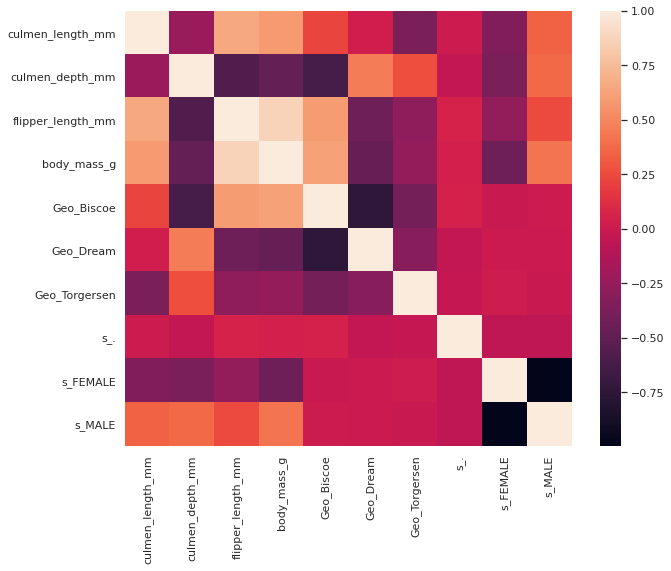

In [ ]:
# A correlation plot
sns.heatmap(pen.corr())

#Data transform - prep for SML

In [ ]:
pen.dtypes

species_short         object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
Geo_Biscoe             uint8
Geo_Dream              uint8
Geo_Torgersen          uint8
s_.                    uint8
s_FEMALE               uint8
s_MALE                 uint8
dtype: object

In [ ]:
# Select the (independant) features that we are going to use to train the model
X = pen.loc[:,'culmen_length_mm':'s_MALE']

In [ ]:
# Define the dependant variabel / target to predict (species)
y = pen.species_short

In [ ]:
# Load and instantiate a LabelEncoder that will turn our text labels
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
# Transform labels into indices by passing y to the encoder
y_enc = encoder.fit_transform(y)

In [ ]:
# Load and instantiate a StandardSclaer 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# Apply the scaler to our X-features
X_scaled = scaler.fit_transform(X)

Splitting dataset

In [ ]:
# Split the data using the train_test_split module. We keep 20% of the data for testing and use 80% to train the model
# Random state defined with an arbitrary number for reproducibility

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_enc, test_size = 0.2, random_state = 7)

In [ ]:
# Import modules that we are going to use for all models

# Import K-fold crossvalidation
from sklearn.model_selection import cross_val_score

# Import Classification Report for later evaluatoion of performance
from sklearn.metrics import classification_report

#LogReg

In [ ]:
# Import and instantiate the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

# K-fold cross-validation (splitting the 80% into 3 chunks, using 4 to train and 1 to evaluate)
scores = cross_val_score(model, X_train, y_train, cv = 3)
print(scores)

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set
print(model.score(X_test, y_test),print('fairly overtrained?!'))

[1.         0.98876404 1.        ]
fairly overtrained?!
0.9850746268656716 None


In [ ]:
# Performance evaluation using the classification_report

target_names = encoder.inverse_transform(list(set(y_test))) # get real region names back using inverse_transform

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred, target_names = target_names)) #Print out the report

              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.98        28
   Chinstrap       1.00      0.93      0.97        15
      Gentoo       1.00      1.00      1.00        24

    accuracy                           0.99        67
   macro avg       0.99      0.98      0.98        67
weighted avg       0.99      0.99      0.98        67



#Investigate the output

In [ ]:
!!pip uninstall -qq mlxtend -y
# For that we need to install an updated version of the MLxtend library (it will make plotting of the confusion matrix easy)
!pip install -qq -U mlxtend


# Import the confusion matrix plotter module
from mlxtend.plotting import plot_confusion_matrix

# We will also import sklearns confusion matrix module that will make it easy to produce a confusion matrix
# It's actually just a cross-tab of predicted vs. real values
from sklearn.metrics import confusion_matrix

     |████████████████████████████████| 1.4MB 5.5MB/s 


(<Figure size 720x576 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7c08aa4438>)

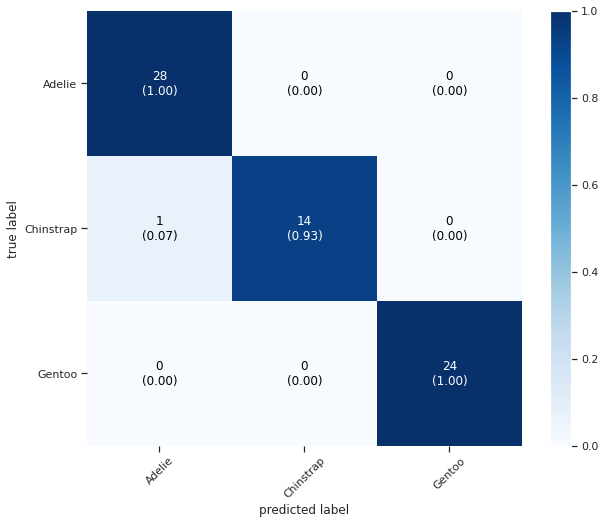

In [ ]:
# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                hide_spines = True,
                                class_names=target_names)

#random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

model.fit(X_train, y_train)
print(model.score(X_test, y_test))

[1.         1.         1.         0.98113208 0.98113208]
0.9850746268656716


In [ ]:
# Performance evaluation using the classification_report

target_names = encoder.inverse_transform(list(set(y_test))) # get real region names back using inverse_transform

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred, target_names=target_names)) #Print out the report

              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.98        28
   Chinstrap       1.00      0.93      0.97        15
      Gentoo       1.00      1.00      1.00        24

    accuracy                           0.99        67
   macro avg       0.99      0.98      0.98        67
weighted avg       0.99      0.99      0.98        67



(<Figure size 720x576 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7c087a2780>)

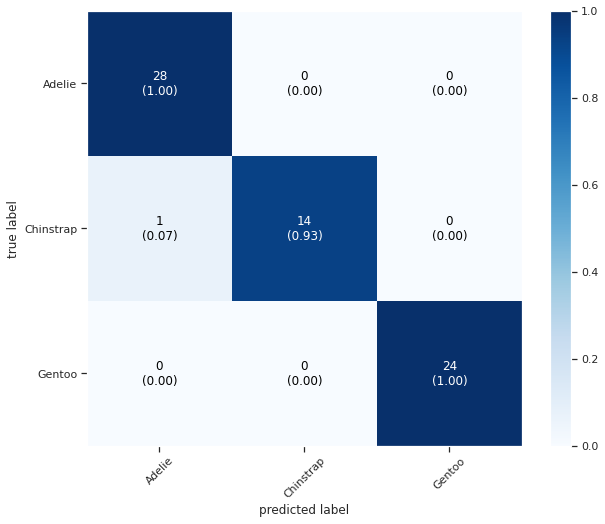

In [ ]:
# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names = target_names)

RF performs slightly better on the test data than LogReg, however it is marginal, and one should consider if the model is overfitted, as there's not that many instances all together...

XG Boost

In [ ]:
import xgboost as xgb

model = xgb.XGBClassifier()

scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

model.fit(X_train, y_train)
print(model.score(X_test, y_test))

[0.98148148 1.         0.98113208 0.98113208 0.96226415]
0.9850746268656716


In [ ]:
# Performance evaluation using the classification_report

target_names = encoder.inverse_transform(list(set(y_test))) # get real region names back using inverse_transform

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred, target_names=target_names)) #Print out the report

              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.98        28
   Chinstrap       1.00      0.93      0.97        15
      Gentoo       1.00      1.00      1.00        24

    accuracy                           0.99        67
   macro avg       0.99      0.98      0.98        67
weighted avg       0.99      0.99      0.98        67



(<Figure size 720x576 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7c087a0630>)

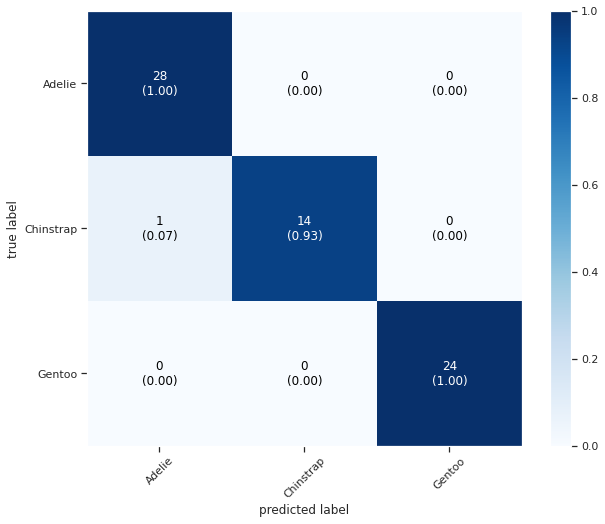

In [ ]:
# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names = target_names)

All in all, all models perform so well, that only one sad little penguin is not being recognized - must be a sad one...

## Employee turnover

### The assignment

In the repo, you will find a dataset describing employee turnover in a company.

https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/turnover.csv

The dataset contains data collected in an employee survey and enriched with HR data.

The variable `churn` tells us if the employee left the company in the past 3 months. The other variables are collected

#### Classification

Try to predict `churn` using a classification pipeline (perhaps add some simple exploration of the data first)

#### Regression
Try to predict the number of weekly average hours worked.

**Before** working with the data, you should use `pd.get_dummies` to get dummies for categorical variables.

In [ ]:
# Your solutions from here...

In [ ]:
# Import standard Libraries


# !pip install -qq -U matplotlib
import pandas as pd #Pandas handles tabular data
pd.set_option('display.float_format', lambda x: '%.3f' % x) # turn off scientific notation and too much decimal blah
import matplotlib.pyplot as plt # standard plotting library
import numpy as np #Numpy for linear algebra & co
import seaborn as sns # For pretty dataviz
import altair as alt
from sklearn.preprocessing import  StandardScaler
from sklearn.decomposition import PCA # PCA from  sklearn, the python ML standard library
sns.set_style("darkgrid") # Define style for dataviz

sns.set(rc={'figure.figsize':(10,10)})

In [ ]:
#import data
#obs fastpages is a great way to visualize data for pages or github or the like - fastpages notebook
data = pd.read_csv('https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/turnover.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14999 non-null  float64
 1   evaluation            14999 non-null  float64
 2   number_of_projects    14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   churn                 14999 non-null  int64  
 7   promotion             14999 non-null  int64  
 8   department            14999 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#data transformation

In [ ]:
#converting 'department' and 'salary' into binary indicators, to be able to include them in the models
data_red = pd.get_dummies(data, prefix=['dep', 'sal'], columns=['department', 'salary'])
# # alternative???? df = data.apply(pd.to_numeric, errors='coerce')
data_red.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,dep_IT,dep_RandD,dep_accounting,dep_hr,dep_management,dep_marketing,dep_product_mng,dep_sales,dep_support,dep_technical,sal_high,sal_low,sal_medium
0,0.380,0.530,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.800,0.860,5,262,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.110,0.880,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.720,0.870,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.370,0.520,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
data_red.isnull().sum() # checked for nan-values 

satisfaction            0
evaluation              0
number_of_projects      0
average_montly_hours    0
time_spend_company      0
work_accident           0
churn                   0
promotion               0
dep_IT                  0
dep_RandD               0
dep_accounting          0
dep_hr                  0
dep_management          0
dep_marketing           0
dep_product_mng         0
dep_sales               0
dep_support             0
dep_technical           0
sal_high                0
sal_low                 0
sal_medium              0
dtype: int64

In [ ]:
data_red.info

<bound method DataFrame.info of        satisfaction  evaluation  ...  sal_low  sal_medium
0             0.380       0.530  ...        1           0
1             0.800       0.860  ...        0           1
2             0.110       0.880  ...        0           1
3             0.720       0.870  ...        1           0
4             0.370       0.520  ...        1           0
...             ...         ...  ...      ...         ...
14994         0.400       0.570  ...        1           0
14995         0.370       0.480  ...        1           0
14996         0.370       0.530  ...        1           0
14997         0.110       0.960  ...        1           0
14998         0.370       0.520  ...        1           0

[14999 rows x 21 columns]>

In [ ]:
#exploration
sns.pairplot(data_red)

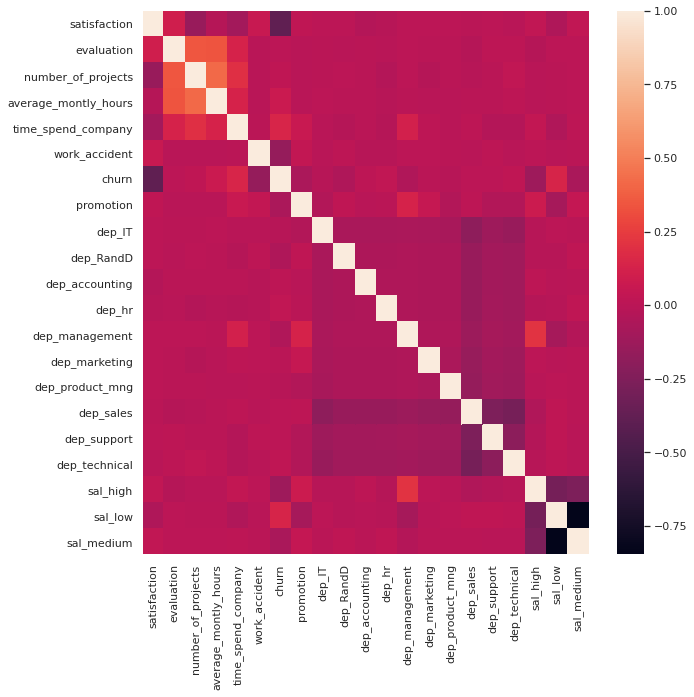

In [ ]:
#a correlation plot
sns.heatmap(data_red.corr())

In [ ]:
#data needs to be standardized 
# Let's standard-scale our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#transforming data to mean = 0
data_scaled = scaler.fit_transform(data_red)
pd.DataFrame(data_scaled, columns=data_red.columns).describe()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,dep_IT,dep_RandD,dep_accounting,dep_hr,dep_management,dep_marketing,dep_product_mng,dep_sales,dep_support,dep_technical,sal_high,sal_low,sal_medium
count,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000
mean,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.103,-2.080,-1.463,-2.103,-1.026,-0.411,-0.559,-0.147,-0.298,-0.235,-0.232,-0.228,-0.209,-0.246,-0.253,-0.617,-0.418,-0.471,-0.300,-0.976,-0.868
25%,-0.695,-0.912,-0.652,-0.902,-0.341,-0.411,-0.559,-0.147,-0.298,-0.235,-0.232,-0.228,-0.209,-0.246,-0.253,-0.617,-0.418,-0.471,-0.300,-0.976,-0.868
50%,0.109,0.023,0.160,-0.021,-0.341,-0.411,-0.559,-0.147,-0.298,-0.235,-0.232,-0.228,-0.209,-0.246,-0.253,-0.617,-0.418,-0.471,-0.300,-0.976,-0.868
75%,0.833,0.899,0.971,0.880,0.344,-0.411,-0.559,-0.147,-0.298,-0.235,-0.232,-0.228,-0.209,-0.246,-0.253,1.620,-0.418,-0.471,-0.300,1.025,1.152
max,1.557,1.659,2.594,2.182,4.453,2.432,1.789,6.784,3.350,4.250,4.308,4.393,4.776,4.060,3.953,1.620,2.394,2.125,3.335,1.025,1.152


In [ ]:
# Initialize a model
model = PCA(n_components=7) #for faster processing
model

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# Fitr the model
model.fit(data_scaled)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# Fit and transform the data
data_ = model.transform(data_scaled)

In [ ]:
plot_data = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack()

In [ ]:
# Transfer the (categorical) outcome of interest to the index (PCA only works with numerical data)
data_ind = data_red.set_index('churn', inplace=True)

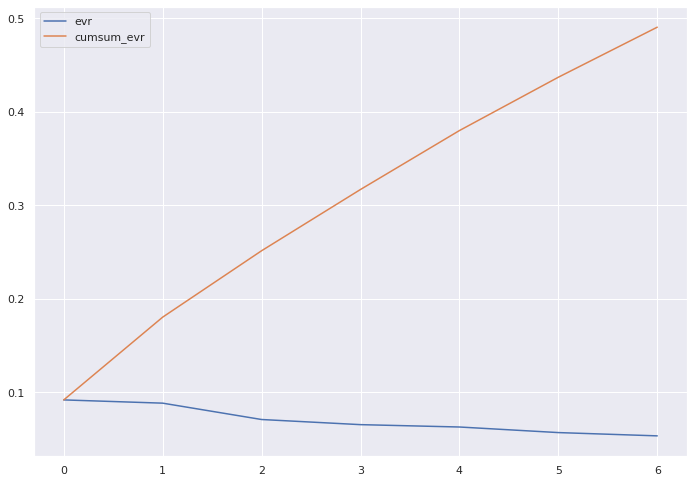

In [ ]:
# Choice of components visualized
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

PCA indicate 2-3 var to include

In [ ]:
# How mach "information" do we kick out?
model.explained_variance_ratio_.sum()

0.4905257694058672

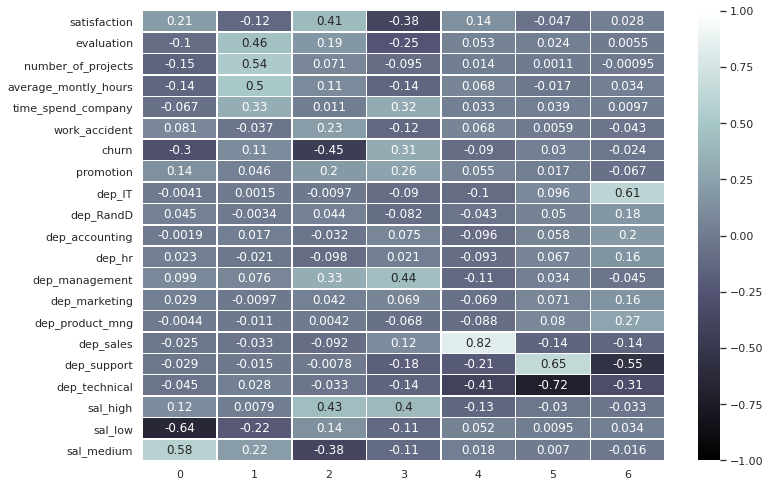

In [ ]:
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="bone", vmin=-1, vmax=1, annot=True)

looks like a low salary and people from the technical department have a high negative correlation w churn = maybe consider higher salaries and working conditions for the technical department, to improve churn.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


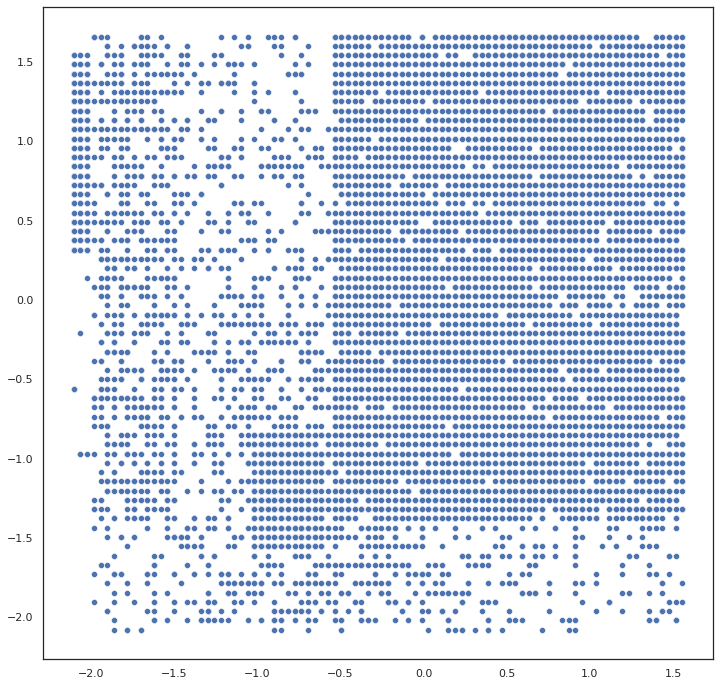

In [ ]:
# Plotting....
plt.figure(figsize=(12,12))
sns.set_theme(style="white")
g = sns.scatterplot(data_scaled[:,0], data_scaled[:,1],
                    legend='full',
                    palette='black')

legend = g.get_legend()

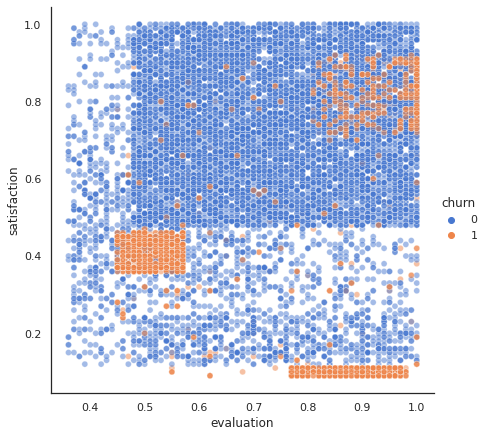

In [ ]:
#Where can we find ppl who churn...
satisfaction = sns.relplot(data = data_red, x = 'evaluation',
            y = 'satisfaction', hue = 'churn', sizes = (40, 400), alpha=.5,
            palette = 'muted', height = 6)

The variable churn tells us if the employee left the company in the past 3 months. The other variables are collected

Classification
Try to predict churn using a classification pipeline (perhaps add some simple exploration of the data first)

Regression
Try to predict the number of weekly average hours worked.

Before working with the data, you should use pd.get_dummies to get dummies for categorical variables.

In [ ]:
#building models
scaler = StandardScaler()
data_mod = scaler.fit_transform(data_red)
pd.DataFrame(data_mod, columns=data_red.columns).describe()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,dep_IT,dep_RandD,dep_accounting,dep_hr,dep_management,dep_marketing,dep_product_mng,dep_sales,dep_support,dep_technical,sal_high,sal_low,sal_medium
count,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000
mean,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.103,-2.080,-1.463,-2.103,-1.026,-0.411,-0.559,-0.147,-0.298,-0.235,-0.232,-0.228,-0.209,-0.246,-0.253,-0.617,-0.418,-0.471,-0.300,-0.976,-0.868
25%,-0.695,-0.912,-0.652,-0.902,-0.341,-0.411,-0.559,-0.147,-0.298,-0.235,-0.232,-0.228,-0.209,-0.246,-0.253,-0.617,-0.418,-0.471,-0.300,-0.976,-0.868
50%,0.109,0.023,0.160,-0.021,-0.341,-0.411,-0.559,-0.147,-0.298,-0.235,-0.232,-0.228,-0.209,-0.246,-0.253,-0.617,-0.418,-0.471,-0.300,-0.976,-0.868
75%,0.833,0.899,0.971,0.880,0.344,-0.411,-0.559,-0.147,-0.298,-0.235,-0.232,-0.228,-0.209,-0.246,-0.253,1.620,-0.418,-0.471,-0.300,1.025,1.152
max,1.557,1.659,2.594,2.182,4.453,2.432,1.789,6.784,3.350,4.250,4.308,4.393,4.776,4.060,3.953,1.620,2.394,2.125,3.335,1.025,1.152


In [ ]:
# Select the (independant) features that we are going to use to train the model
X = data_red.loc[:,'satisfaction':'sal_medium']
X = X.drop(['churn'], axis=1) #dropping target var, to avoid it being used for prediction...
# Define the dependant variabel / target to predict (churn)
y = data_red.churn

In [ ]:
# Load and instantiate a LabelEncoder that will turn our text labels (regions into indices)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
# Transform labels into indices by passing y to the encoder
y_enc = encoder.fit_transform(y)

In [ ]:
# Load and instantiate a StandardSclaer 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# Apply the scaler to our X-features
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data using the train_test_split module. We keep 20% of the data for testing and use 80% to train the model
# Random state defined with an arbitrary number for reproducibility

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_enc, test_size = 0.2, random_state = 7)

In [ ]:
# Import K-fold crossvalidation
from sklearn.model_selection import cross_val_score

# Import Classification Report for later evaluatoion of performance
from sklearn.metrics import classification_report

In [ ]:
#LogReg
# Import and instantiate the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=50)

# K-fold cross-validation (splitting the 80% into 5 chunks, using 4 to train and 1 to evaluate)
scores = cross_val_score(model, X_train, y_train, cv = 7)
print(scores)

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set
print(model.score(X_test, y_test))

[0.78658892 0.78879813 0.78413069 0.79638273 0.79346558 0.7957993
 0.77946324]
0.7863333333333333


Fairly good performance....

In [ ]:
# Performance evaluation using the classification_report

target_names = encoder.inverse_transform(list(set(y_test))) # get real region names back using inverse_transform

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred, target_names = ['does not churn', 'does churn'])) #Print out the report

                precision    recall  f1-score   support

does not churn       0.82      0.92      0.87      2317
    does churn       0.55      0.33      0.41       683

      accuracy                           0.79      3000
     macro avg       0.69      0.63      0.64      3000
  weighted avg       0.76      0.79      0.77      3000



(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7be910c240>)

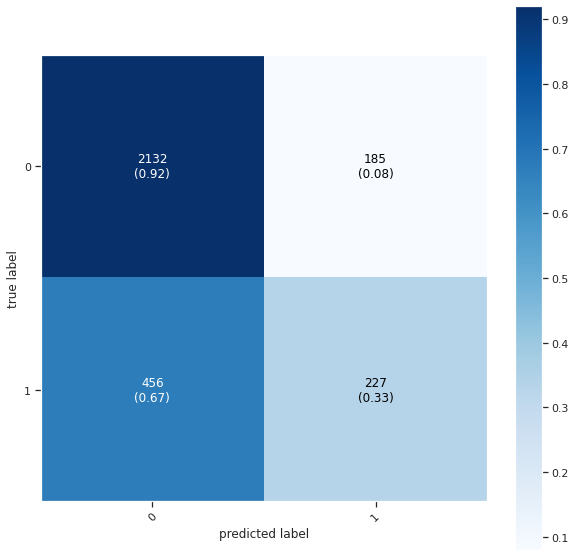

In [ ]:
# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names = target_names)

confusion matrix shows also the skewness in data, that might be the reason for the accuracy score, as the minority data class is so small...

---

# Portfolio assignments for Wednesday

**Requirement:**

## Exercise for spatial stuff

So, now I have a better hypothesis; mental health has something to do with noise!

Here, you find a new geo-dataset;

- OPEN_DATA_STOEJDATA_VIEWPoint.shp

This contains information about noise at different places within municipalities. The end goal is to create a map where each point is aggregated to municipality level and we visualize where the noise is more severe. We use the column "GNSHAST071" to measure average noice at that point.

When that map is done, create a pretty map with the mental health measurement and compare the two - are there any connection between noise at an aggregated level and mental health?

Feel free to play around with types of basemaps, types of colors and all sorts of things - the goal is not to become the leading expert in making fancy maps but to have fun and learn stuff.

In [ ]:
!pip install geopandas # geopandas is not installed by default on Colab - this installs it
!pip install contextily # contextily is not installed by default on Colab - this installs it
!pip install pygeos # pygeos optional dependency for geopandas (which we will use)

In [ ]:
y
y
# Download and unzip shape files

!wget "https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip"
!unzip shapefiles_exercise.zip

!wget "https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles.zip" # Downloads data files
!unzip shapefiles.zip # Unpacks data files

In [ ]:
# Loading required packages
import geopandas as gpd 
import pandas as pd
import matplotlib.pyplot as plt
from pyproj import Proj
import contextily as ctx

In [ ]:
municipalities = gpd.read_file("KOMMUNE.shp")
municipalities.head(3)

,FEAT_ID,FEAT_KODE,FEAT_TYPE,FEAT_STTXT,GEOM_STTXT,DAGI_ID,AREAL,REGIONKODE,REGIONNAVN,GYLDIG_FRA,GYLDIG_TIL,KOMKODE,KOMNAVN,DQ_SPECIFK,DQ_STATEM,DQ_DESCR,DQ_PROCESS,DQ_RESPONS,DQ_POSACPL,DQ_POSACLV,TIMEOF_CRE,TIMEOF_PUB,TIMEOF_REV,TIMEOF_EXP,geometry
0,149673,6310,Kommune,vedtaget,endelig,389146,24010.290,1085,Region Sjælland,2019-01-01,None,0350,Lejre,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2019-01-01,2019-01-07,None,2020-11-07,"POLYGON Z ((675926.480 6172129.210 -999.000, 6..."
1,149674,6310,Kommune,vedtaget,endelig,389146,24010.290,1085,Region Sjælland,2019-01-01,None,0350,Lejre,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2019-01-01,2019-01-07,None,2020-11-07,"POLYGON Z ((687523.890 6176458.950 -999.000, 6..."
2,149675,6310,Kommune,vedtaget,endelig,389146,24010.290,1085,Region Sjælland,2019-01-01,None,0350,Lejre,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2019-01-01,2019-01-07,None,2020-11-07,"POLYGON Z ((689361.510 6173523.720 -999.000, 6..."


In [ ]:
municipalities.crs

In [ ]:
# Load the data

stoejdata = gpd.read_file("OPEN_DATA_STOEJDATA_VIEWPoint.shp")
stoejdata.dtypes

In [ ]:
stoejdata.crs

In [ ]:
stoej = stoejdata[['geometry', 'KOMMUNE', 'GNSHAST071']]
mun = mun[['FEAT_KODE', 'geometry']]

In [ ]:
stoej['KOMMUNE'].astype(float)
mun['FEAT_KODE'].astype(float)


In [ ]:
#align geodata sys
mun = municipalities.to_crs(epsg=3857)
stoej = stoejdata.to_crs(epsg=3857)

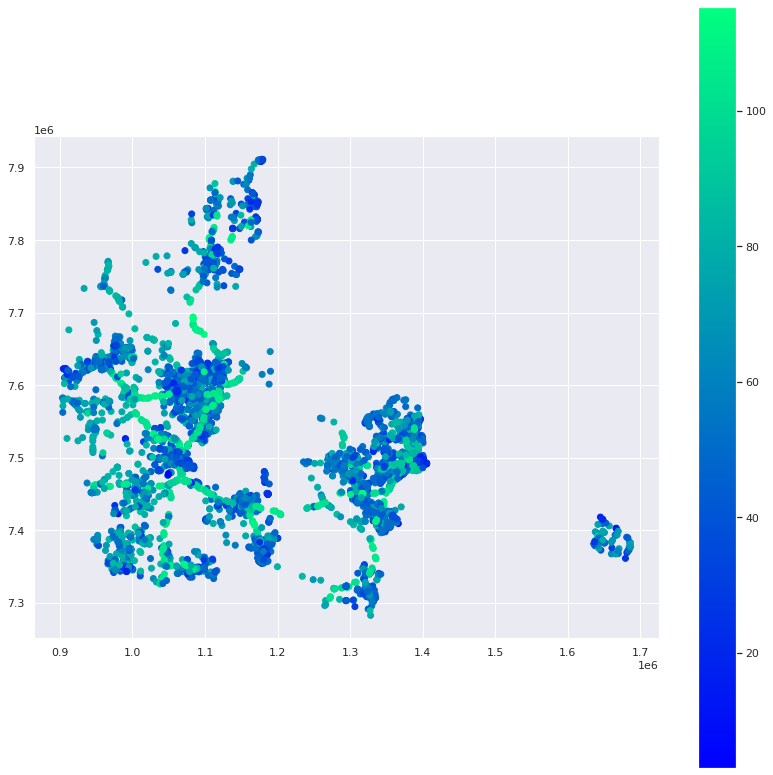

In [ ]:
#testplot noise
stoej.plot(column="GNSHAST071", legend="True", figsize=(14,14), cmap='winter')

In [ ]:
mun_fun = gpd.sjoin(mun, stoej, how="inner", op='intersects')
mun_fun.head()

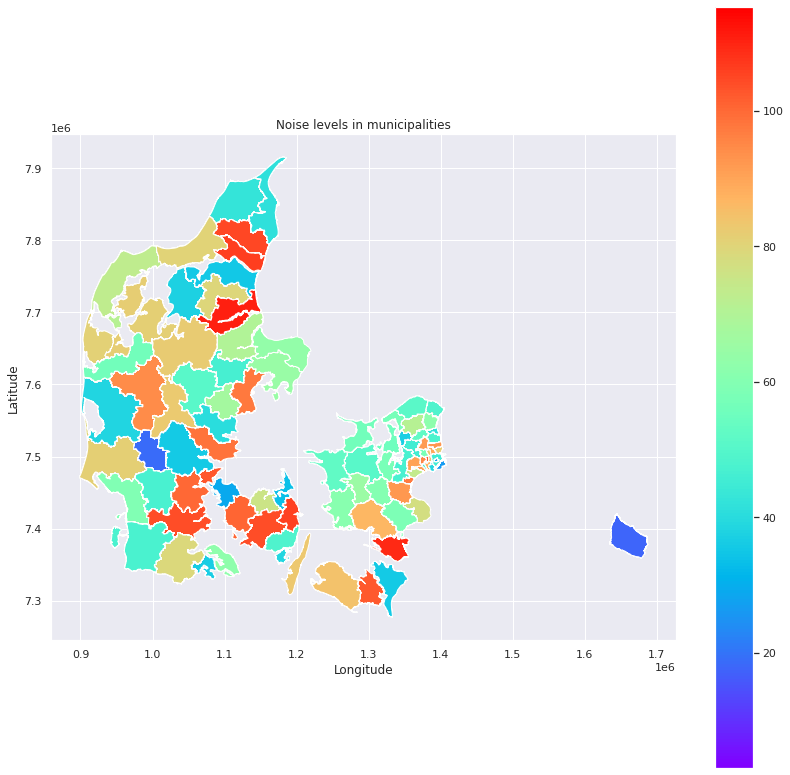

In [ ]:
#combining plots
fig, ax =plt.subplots(1,1, figsize=(14,14))
plt.title('Noise levels in municipalities')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
mun_fun.plot(column="GNSHAST071", ax=ax, legend=True, label='Noise', cmap='rainbow')

In [ ]:
# #removing charachters in 'KOMMUNE' TO MERGE DATA WITH STOJ
# stoejdata['KOMMUNE'] = stoejdata['KOMMUNE'].astype(str).str.replace('.0000', '')
# stoejdata.dtypes

## Portfolio assignments for Thursday

**Requirement:**